In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils

# Displays all dataframe columns
pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
df = utils.read_route_descriptions()
df.head()

No compiled route descriptions file found, compiling list from files in the data directory
Exploding columns for grade
Exploding columns for type
Exploding columns for metadata
Extracting the longitude/latitude
Adding the number of routes per sector
Renaming metadata columns


,route_name,safety,fa,description,location,protection,State,grade_YDS,grade_French,grade_Ewbanks,grade_UIAA,grade_ZA,grade_British,grade_Font,grade_yds_aid,type_trad,type_sport,type_tr,type_boulder,type_aid,type_snow,type_ice,type_alpine,type_mixed,left_right_seq,parent_sector,route_id,sector_id,Longitude,Latitude,num_routes_in_sector
0,Visions of Yesteryears,,Manuel Rangel and Aaron Collins,[As Manny and I were setting up an anchor to g...,[The route is the obvious left trending corner...,[small to large gear with bolted anchors],Arizona,5.10,6b,20,VII-,19,E2 5b,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Workman Falls,108120614,108118475,-110.93062,33.81839,8
1,Unnamed 1,,????,[Crux is the starting moves. 4 well protected ...,[About 50yrs beyond the bridge (going up the m...,"[Four Quick Draws, Cams/Nuts to build and anc...",Arizona,5.6,4c,14,V,12,S 4b,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Workman Falls,113751049,108118475,-110.93062,33.81839,8
2,Two in a Toyota Smiling,,"Aaron Collins, William Bester, John Biskup",[Two in a Toyota Smiling Â requires 14 Draws t...,[left of the waterfall],[bolts],Arizona,5.11-,6c,22,VIII+,22,E3 5c,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Workman Falls,117547284,108118475,-110.93062,33.81839,8
3,Thin Red Line,,"Aaron Collins, Logan Johnson, Porter Collins, ...",[Climbs the broken rock just left of a slabby ...,[Right wall of a short slot canyon just before...,[11 bolts],Arizona,5.9+,5c,17,VI,17,E1 5a,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Workman Falls,117618246,108118475,-110.93062,33.81839,8
4,La Vida,,Aaron Collins,[Follows right leaning crack til it ends about...,[Left shoulder of the wall before you can see ...,[Standard rack],Arizona,5.7+,5a,15,V+,13,MVS 4b,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Workman Falls,109636913,108118475,-110.93062,33.81839,8


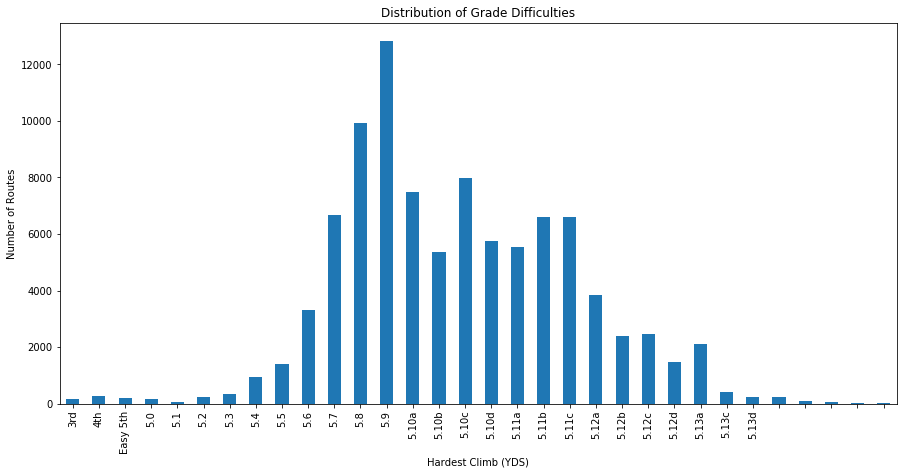

In [17]:
# Creating a conversion table of Ewbanks -> YDS for axis labeling
# Using Ewbanks because it is a purely numerical representation
df['grade_Ewbanks'] = df['grade_Ewbanks'].astype(float)
ewbanks_yds_conversion = df.groupby(['grade_YDS', 'grade_Ewbanks']).size()
ewbanks_yds_conversion = ewbanks_yds_conversion.reset_index().rename({0: 'NumRoutes'}, axis=1)

# Only keeping the more commonly occuring YDS grade in cases where there are many YDS grades to one Ewbanks grade
ewbanks_yds_conversion = ewbanks_yds_conversion.sort_values(['grade_Ewbanks', 'NumRoutes'], ascending=False)
ewbanks_yds_conversion = ewbanks_yds_conversion.drop_duplicates('grade_Ewbanks', keep='first')
ewbanks_yds_conversion.drop('NumRoutes', axis=1, inplace=True)

# Converting to a dictionary for being able to more easily convert between the two
ewbanks_yds_conversion = dict(zip(ewbanks_yds_conversion['grade_Ewbanks'], ewbanks_yds_conversion['grade_YDS'])) 

# Examining the distribution of grades
# Using the Ewbanks grade since it has a numerical representation, but using YDS in the axis labels
ax = df['grade_Ewbanks'].value_counts().sort_index().plot.bar(figsize=(15, 7))
labels = ax.get_xticks().tolist()
updated_labels = [ewbanks_yds_conversion[label] for label in labels if label in ewbanks_yds_conversion.keys()]
ax.set_xticklabels(updated_labels)
plt.title('Distribution of Grade Difficulties')
plt.xlabel('Hardest Climb (YDS)')
plt.ylabel('Number of Routes')
plt.show()

Text(0.5, 0, 'Percent of Routes')

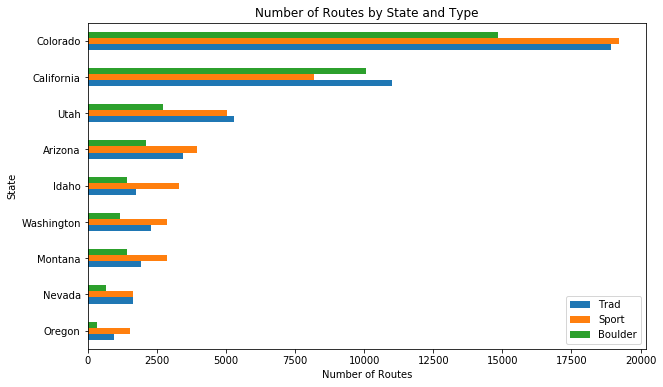

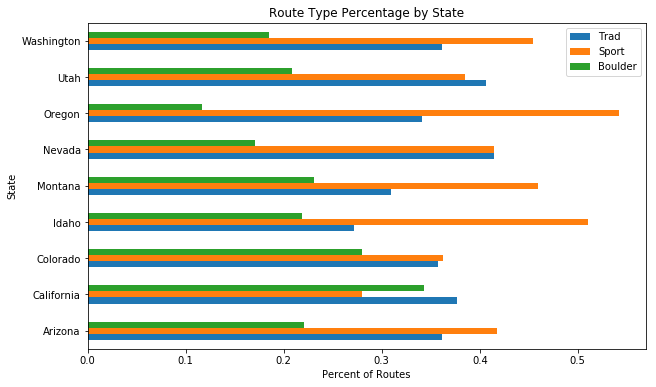

In [14]:
# Number of routes by state and type
num_routes_by_state = df.groupby('State')[['type_trad', 'type_sport', 'type_boulder']].sum()
num_routes_by_state.rename({'type_trad': 'Trad', 'type_sport': 'Sport', 'type_boulder': 'Boulder'}, axis=1, inplace=True)
num_routes_by_state.sort_values('Sport').plot.barh(figsize=(10, 6))
plt.title('Number of Routes by State and Type')
plt.xlabel('Number of Routes')

# Percentage of routes by route type in each state
num_routes_by_state.apply(lambda x: x / x.sum(), axis=1).plot.barh(figsize=(10, 6))
plt.title('Route Type Percentage by State')
plt.xlabel('Percent of Routes')

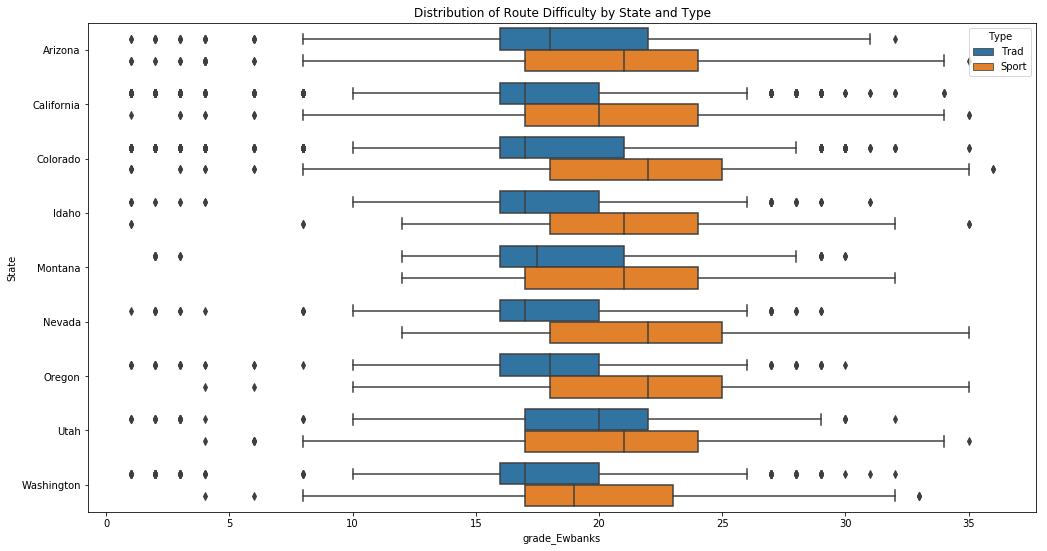

In [18]:
# Difficulty by State and Type
df['Type'] = np.where(df['type_trad'] == True, 'Trad',
             np.where(df['type_sport'] == True, 'Sport',
             np.where(df['type_boulder'] == True, 'Boulder', 'Other')))

plt.figure(figsize=(17, 9))
ax = sns.boxplot(y='State', x='grade_Ewbanks', hue='Type', data=df[df['Type'].isin(['Sport', 'Trad'])])
plt.title('Distribution of Route Difficulty by State and Type')
# TODO: Convert the x axis to the YDS
plt.show()

### TODO

- Map with heatmap of route density, incl. pivots by type
- Map with heatmap of route difficulty
- What is the most difficult area?
- Where is the highest concentration of routes?
- What area has the highest concentration of a certain grade and type?